Total Energy of the system: -9.399999999999991
Energy components: {'plant_fungus': 6.8000000000000025, 'plant_plant': -14.199999999999992, 'plant_offspring': -2.0}


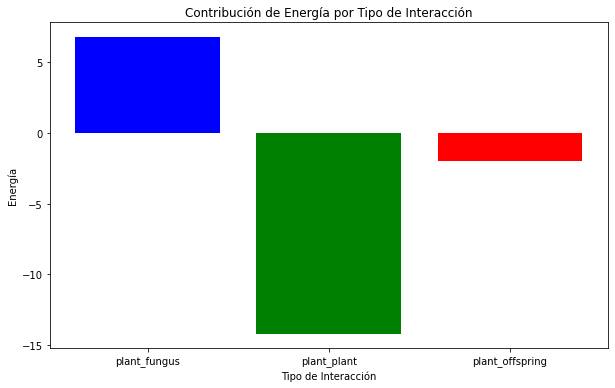

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de parámetros básicos del modelo y nutrientes adicionales
N = 100  # Número de plantas
M = 5000  # Número de esporas
P = 50   # Número de vástagos
nutrients = {'P': 0.2, 'N': 0.1, 'K': 0.05}  # Disponibilidad de fósforo, nitrógeno y potasio

# Coeficientes de interacción por nutriente para cada especie
J_species = {'P': np.array([1.0, 1.5, 2.0]), 'N': np.array([0.8, 1.2, 1.5]), 'K': np.array([0.6, 1.0, 1.3])}

# Coeficientes de competencia intraespecífica y beneficio mutuo
K_species = np.array([-0.2, -0.3, -0.1])  # Competencia entre plantas
G = 0.5  # Beneficio entre plantas y vástagos

# Temperatura y asignación aleatoria de especies a cada planta
temp = 2.5  
species_types = np.random.randint(0, 3, N)

# Estados iniciales aleatorios para plantas, esporas y vástagos
plant_spins = np.random.choice([-1, 1], size=N)
fungus_spins = np.random.choice([-1, 1], size=M)
offspring_spins = np.random.choice([-1, 1], size=P)

# Conexiones aleatorias
connections_ph = [np.random.choice(range(M), size=np.random.randint(5, 15), replace=False) for _ in range(N)]
connections_pv = [np.random.choice(range(P), size=np.random.randint(1, 3), replace=False) for _ in range(N)]

def calculate_energy():
    energy = 0
    energy_details = {'plant_fungus': 0, 'plant_plant': 0, 'plant_offspring': 0}
    
    # Interacciones planta-hongo para cada nutriente
    for i in range(N):
        species = species_types[i]
        for nutrient, availability in nutrients.items():
            interaction_energy = -J_species[nutrient][species] * availability * np.sum(plant_spins[i] * fungus_spins[connections_ph[i]])
            energy += interaction_energy
            energy_details['plant_fungus'] += interaction_energy

    # Interacciones planta-planta
    for i in range(N):
        for j in range(N):
            if i != j:
                species_i = species_types[i]
                interaction_energy = -K_species[species_i] * plant_spins[i] * plant_spins[j]
                energy += interaction_energy
                energy_details['plant_plant'] += interaction_energy

    # Interacciones planta-vástago
    for i in range(N):
        interaction_energy = -G * np.sum(plant_spins[i] * offspring_spins[connections_pv[i]])
        energy += interaction_energy
        energy_details['plant_offspring'] += interaction_energy
    
    return energy, energy_details

# Ejecución y visualización de resultados
total_energy, energy_components = calculate_energy()
print(f"Total Energy of the system: {total_energy}")
print(f"Energy components: {energy_components}")

categories = list(energy_components.keys())
values = list(energy_components.values())
colors = ['blue', 'green', 'red']
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.xlabel('Tipo de Interacción')
plt.ylabel('Energía')
plt.title('Contribución de Energía por Tipo de Interacción')
plt.show()


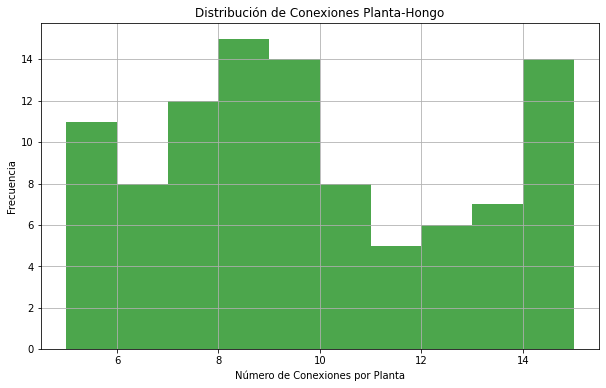

In [20]:
import matplotlib.pyplot as plt

# Suponiendo que 'connections_ph' ya está definido y contiene las conexiones entre plantas y hongos
connection_counts = [len(conn) for conn in connections_ph]

# Visualización de la distribución de conexiones planta-hongo
plt.figure(figsize=(10, 6))
plt.hist(connection_counts, bins=range(min(connection_counts), max(connection_counts) + 2), color='green', alpha=0.7)
plt.title('Distribución de Conexiones Planta-Hongo')
plt.xlabel('Número de Conexiones por Planta')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


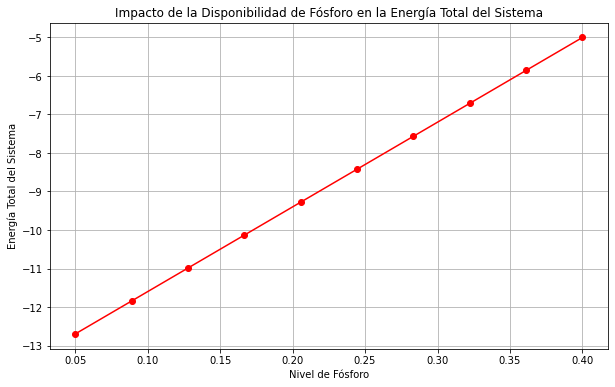

In [22]:
# Variación de la disponibilidad de fósforo y su impacto en la energía del sistema
P_levels = np.linspace(0.05, 0.4, 10)
energies = []

for P_level in P_levels:
    nutrients['P'] = P_level
    total_energy, _ = calculate_energy()
    energies.append(total_energy)

plt.figure(figsize=(10, 6))
plt.plot(P_levels, energies, marker='o', linestyle='-', color='red')
plt.title('Impacto de la Disponibilidad de Fósforo en la Energía Total del Sistema')
plt.xlabel('Nivel de Fósforo')
plt.ylabel('Energía Total del Sistema')
plt.grid(True)
plt.show()


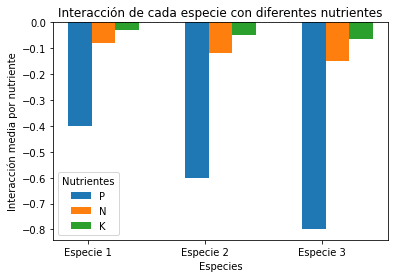

In [17]:
# Generación de datos para la interacción de cada especie con cada tipo de nutriente
species_interaction = np.zeros((num_species, len(nutrients)))
for i in range(num_species):
    for j, nutrient in enumerate(nutrients.keys()):
        species_interaction[i, j] = -J_species[nutrient][i] * nutrients[nutrient]

# Visualización de la interacción de cada especie con diferentes nutrientes
fig, ax = plt.subplots()
species_labels = ['Especie 1', 'Especie 2', 'Especie 3']
nutrients_list = list(nutrients.keys())
ind = np.arange(num_species)  # las ubicaciones x para los grupos
width = 0.2  # ancho de las barras

for i, nutrient in enumerate(nutrients_list):
    ax.bar(ind + i*width, species_interaction[:, i], width, label=nutrient)

ax.set_xlabel('Especies')
ax.set_ylabel('Interacción media por nutriente')
ax.set_title('Interacción de cada especie con diferentes nutrientes')
ax.set_xticks(ind + width / len(nutrients_list))
ax.set_xticklabels(species_labels)
ax.legend(title="Nutrientes")

plt.show()


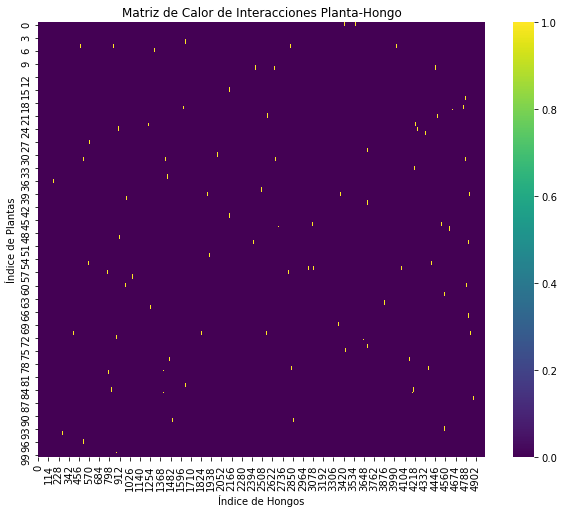

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una matriz de interacción planta-hongo
interaction_matrix = np.zeros((N, M))
for i, connections in enumerate(connections_ph):
    interaction_matrix[i, connections] = 1

# Usar seaborn para crear una matriz de calor
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix, cmap='viridis')
plt.title('Matriz de Calor de Interacciones Planta-Hongo')
plt.xlabel('Índice de Hongos')
plt.ylabel('Índice de Plantas')
plt.show()


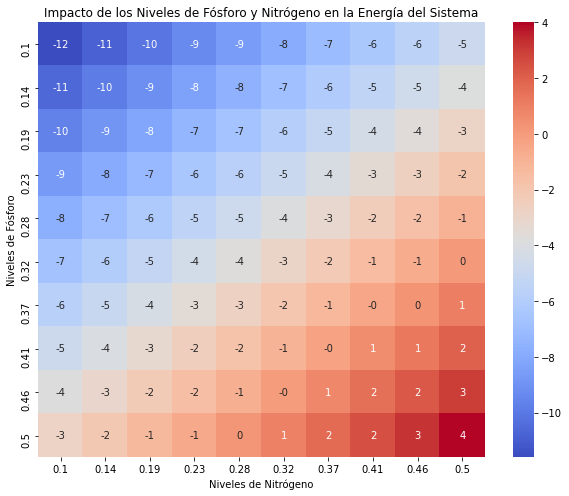

In [24]:
# Suponer que se han calculado las energías para diferentes niveles de todos los nutrientes
nutrient_levels = np.linspace(0.1, 0.5, 10)
energy_results = np.zeros((len(nutrient_levels), len(nutrient_levels)))

for i, P_level in enumerate(nutrient_levels):
    for j, N_level in enumerate(nutrient_levels):
        nutrients['P'] = P_level
        nutrients['N'] = N_level
        total_energy, _ = calculate_energy()
        energy_results[i, j] = total_energy

# Visualización de la matriz de cruce
plt.figure(figsize=(10, 8))
sns.heatmap(energy_results, annot=True, fmt=".0f", cmap='coolwarm', xticklabels=np.round(nutrient_levels, 2), yticklabels=np.round(nutrient_levels, 2))
plt.title('Impacto de los Niveles de Fósforo y Nitrógeno en la Energía del Sistema')
plt.xlabel('Niveles de Nitrógeno')
plt.ylabel('Niveles de Fósforo')
plt.show()


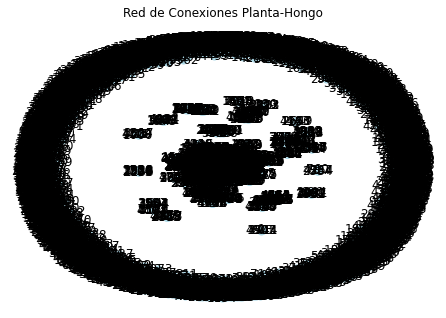

In [26]:
import networkx as nx

# Crear un grafo
G = nx.Graph()

# Añadir nodos para plantas y hongos
G.add_nodes_from(range(N), bipartite=0)  # Plantas
G.add_nodes_from(range(N, N+M), bipartite=1)  # Hongos

# Añadir aristas basadas en conexiones
for i, connections in enumerate(connections_ph):
    for connection in connections:
        G.add_edge(i, N + connection)  # Asegurarse de que los índices de hongos no se solapen con los de plantas

# Visualizar la red
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=50)
plt.title('Red de Conexiones Planta-Hongo')
plt.show()

